# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Leadership appreciates all your hard work. Now, they want your team to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


# **Course 6 End-of-Course Project: Build a machine learning model**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Build a machine learning model**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>

## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?

You are tasked with developing a machine learning model to predict user churn for the Waze app. The goal is to identify users who are at risk of leaving, so that Waze can take proactive steps (like offering incentives or improving user experience) to retain them. This will help Waze increase user retention, optimize its app features, and grow its user base.

2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  
A false negative would result in the failure to identify at-risk users, allowing them to churn without any intervention. This could lead to a significant loss of users who may have been retained with the right engagement or incentives. It may negatively affect long-term user growth and retention.
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?

A false positive would lead to unnecessary efforts to retain users who were unlikely to leave in the first place. This could result in wasted resources, such as offering incentives or running campaigns for users who would have remained loyal. It could also cause customer frustration if they feel targeted unnecessarily.

3.  Do the benefits of such a model outweigh the potential problems?

Yes, the benefits of building a churn prediction model do outweigh the potential problems, but with caution. While false negatives and false positives could incur costs, the model can help Waze proactively identify users at risk and take targeted actions to prevent churn. If properly optimized and continuously monitored for fairness and effectiveness, the model can greatly improve retention, customer satisfaction, and long-term user growth. However, it is crucial to manage model errors and ensure that resources are focused on the most impactful users.

4.  Would you proceed with the request to build this model? Why or why not?

Yes, I would proceed with building this model, with the following considerations:

Ethical Data Handling: I would ensure that user data is protected and anonymized, and make sure the model is free from bias.

Error Management: I would carefully assess the trade-offs between false positives and false negatives and tailor the model to minimize the negative impacts of both types of errors.

Continuous Monitoring: After the model is deployed, I would ensure ongoing monitoring and adjustments to maintain its accuracy and fairness over time.

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Jupyter from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them
import pickle

Now read in the dataset as `df0` and inspect the first five rows.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the first five rows
df0.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [4]:
# Copy the df0 dataframe
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [6]:
# 1. Create `km_per_driving_day` feature
df['km_per_drive'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_drive'].describe()

C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_drive, dtype: float64

Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [7]:
import numpy as np

# Replace infinite values (both positive and negative) with 0
df['km_per_drive'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify the change with descriptive statistics
print(df['km_per_drive'].describe())

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_drive, dtype: float64


C:\Users\slind\AppData\Local\Temp\ipykernel_21440\2836134920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_per_drive'].replace([np.inf, -np.inf], 0, inplace=True)


#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [8]:
# 1. Create `percent_sessions_in_last_month` column
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) 

# 2. Get descriptive statistics for the new column
print(df['percent_sessions_in_last_month'].describe())

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [9]:
import numpy as np

# Create `professional_driver` feature: 1 if user has >= 60 drives and >= 15 driving days; otherwise 0
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [10]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

As with other features, get descriptive statistics for this new feature.

In [11]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)

# Get descriptive stats for this new feature
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [13]:
import numpy as np
import pandas as pd

# Assuming df is your dataframe
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives'] 
# Get descriptive statistics for the new feature
descriptive_stats = df['km_per_drive'].describe()

# Print the descriptive statistics
print(descriptive_stats)

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64


C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [14]:
import numpy as np

# Convert infinite values in 'km_per_drive' to zero
df['km_per_drive'] = df['km_per_drive'].replace([np.inf, -np.inf], 0)

# Get descriptive statistics to confirm the conversion worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [15]:
# Create the `percent_of_sessions_to_favorite` column
df['percent_of_sessions_to_favorite'] = (
    (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions'] 
)

# Print descriptive statistics for the new column
print(df['percent_of_sessions_to_favorite'].describe())

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64


### **Task 3. Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [16]:
# Drop rows with missing values in the 'label' column
df = df.dropna(subset=['label'])

# Check the shape of the cleaned dataframe to confirm the rows were dropped
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,percent_of_sessions_to_favorite
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,0.953670,1,0.130381,79.430298,0.700931
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,0.406856,0,0.266854,260.389902,0.253903
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0.841186,0,0.051121,113.953460,0.000000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0.724968,0,4.505948,93.351141,4.867640
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,0.499266,1,0.107713,194.342970,1.016363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,52.554489,0.288634,0,1.484826,79.330952,1.524950
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,116.073577,0.223797,0,0.074918,201.686167,0.133212
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,14.145320,0.646893,1,0.225316,180.232076,0.040283
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,33.764655,0.825374,0,0.057309,956.401322,0.249274


### **Task 4. Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Task 5. Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [17]:
# Create a new binary column 'device2' where Android = 0 and iPhone = 1
df['device2'] = df['device'].map({'Android': 0, 'iPhone': 1})

# Check that the transformation worked
print(df[['device', 'device2']].head())

    device  device2
0  Android        0
1   iPhone        1
2  Android        0
3   iPhone        1
4  Android        0


#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [18]:
import numpy as np

# Create binary column 'label2'
df['label2'] = np.where(df['label'] == 'churned', 1, 0)

# Optional: Check that it worked
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### **Task 6. Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [19]:
# Drop `ID` column
df = df.drop(['ID'], axis=1)

### **Task 7. Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [20]:
# Count of each class
print(df['label'].value_counts())

# Percentage of each class
print(df['label'].value_counts(normalize=True) * 100)

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64


Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Task 9. Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Define X (features) and drop 'device' and any identifier columns like 'ID' or 'label'
X = df.drop(columns=['label','label2', 'device'])  # Drop or adjust column names as needed

# 2. Define y (target)
y = df['label2']  # or 'label2' if that's the name in your DataFrame

# Optional: Encode target variable (e.g., retained/churned → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# 3. First split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Second split: 75% of train_val → train, 25% → validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Final confirmation of split sizes
print(f"Total samples: {len(df)}")
print(f"Train set size: {X_train.shape[0]}")       # ~60%
print(f"Validation set size: {X_val.shape[0]}")   # ~20%
print(f"Test set size: {X_test.shape[0]}")        # ~20%

Total samples: 14299
Train set size: 8579
Validation set size: 2860
Test set size: 2860


Verify the number of samples in the partitioned data.

In [22]:
# Print number of samples in each split
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Sanity check: sum should match the original cleaned dataset
total = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]
print(f"Total samples after split: {total}")
print(f"Original dataset size: {df.shape[0]}")

Train set: 8579 samples
Validation set: 2860 samples
Test set: 2860 samples
Total samples after split: 14299
Original dataset size: 14299


This aligns with expectations.

### **Task 10. Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>


**Note:** If your model fitting takes too long, try reducing the number of options to search over in the grid search.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate the classifier
rf = RandomForestClassifier(random_state=0)

# 2. Define hyperparameter grid
cv_params = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': [1.0]
}

# 3. Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

from sklearn.model_selection import GridSearchCV

# 4. Create GridSearchCV object
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',
    verbose=1,          # Optional: to see progress
    n_jobs=-1           # Use all available cores
)

Now fit the model to the training data.

In [24]:
# Fit the random forest model using GridSearchCV
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

Examine the best average score across all the validation folds.

In [25]:
# Examine best average recall score across all validation folds
best_recall_score = rf_cv.best_score_
print(f"Best average recall score from cross-validation: {best_recall_score:.4f}")

Best average recall score from cross-validation: 0.1222


Examine the best combination of hyperparameters.

In [26]:
# Examine best hyperparameter combination
best_params = rf_cv.best_params_
print("Best hyperparameter combination:")
print(best_params)

Best hyperparameter combination:
{'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

This function is provided for you, but if you'd like to challenge yourself, try writing your own function!

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [27]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [28]:
results_df = make_results("RF cv", rf_cv, "recall")
results_df.head()

,model,precision,recall,F1,accuracy
0,RF cv,0.4568,0.122178,0.192462,0.818976


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

cv_params = {
    'max_depth': [6, 12],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [300]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',
    verbose=1,
    n_jobs=-1
)

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [30]:
xgb_cv.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [21:41:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [6, 12], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

Get the best score from this model.

In [31]:
# Examine best average recall score from cross-validation
best_recall_score = xgb_cv.best_score_
print(f"Best average recall score from XGBoost CV: {best_recall_score:.4f}")

Best average recall score from XGBoost CV: 0.1807


And the best parameters.

In [32]:
# Examine best hyperparameter combination
best_params = xgb_cv.best_params_
print("Best hyperparameters for XGBoost model:")
print(best_params)

Best hyperparameters for XGBoost model:
{'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 300}


Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [33]:
results_xgb = make_results(model_object=xgb_cv, model_name="XGB cv", metric="recall")
results = pd.concat([results_df, results_xgb], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.456800,0.122178,0.192462,0.818976
0,XGB cv,0.440615,0.180681,0.255822,0.814081


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Task 11. Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [34]:
# Predict using best Random Forest model
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [35]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_test_scores(model_name, preds, y_test_data):
    '''
    Generate a table of test scores for a classification model.
    
    Returns:
        table: a pandas DataFrame of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({
        'model': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1]
    })

    return table

In [36]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.456800,0.122178,0.192462,0.818976
0,XGB cv,0.440615,0.180681,0.255822,0.814081
0,RF val,0.464286,0.128205,0.200927,0.819231


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [37]:
# Use XGBoost best estimator to predict on validation data
xgb_best_model = xgb_cv.best_estimator_
xgb_val_preds = xgb_best_model.predict(X_val)

# Get validation scores for XGBoost best estimator
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)

# Display updated results
results


,model,precision,recall,F1,accuracy
0,RF cv,0.456800,0.122178,0.192462,0.818976
0,XGB cv,0.440615,0.180681,0.255822,0.814081
0,RF val,0.464286,0.128205,0.200927,0.819231
0,XGB val,0.431111,0.191321,0.265027,0.811888


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 12. Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [38]:
# Use champion XGBoost model (best_estimator_) to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for the XGBoost model
xgb_test_scores = get_test_scores('XGB Test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)

# Display final results table
results

,model,precision,recall,F1,accuracy
0,RF cv,0.456800,0.122178,0.192462,0.818976
0,XGB cv,0.440615,0.180681,0.255822,0.814081
0,RF val,0.464286,0.128205,0.200927,0.819231
0,XGB val,0.431111,0.191321,0.265027,0.811888
0,XGB Test,0.396624,0.185404,0.252688,0.805594


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Task 13. Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

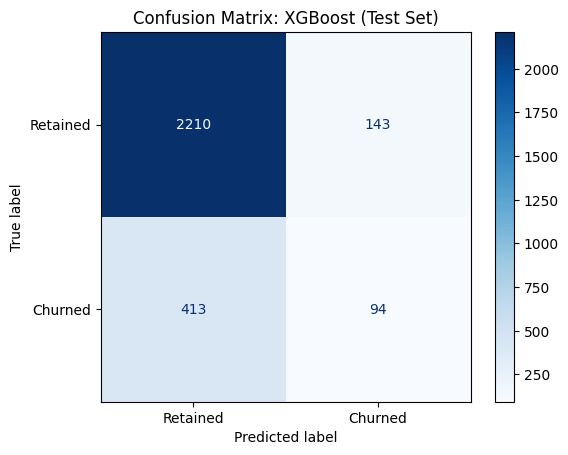

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Retained', 'Churned'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix: XGBoost (Test Set)")
plt.show()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Task 14. Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Figure size 1000x600 with 0 Axes>

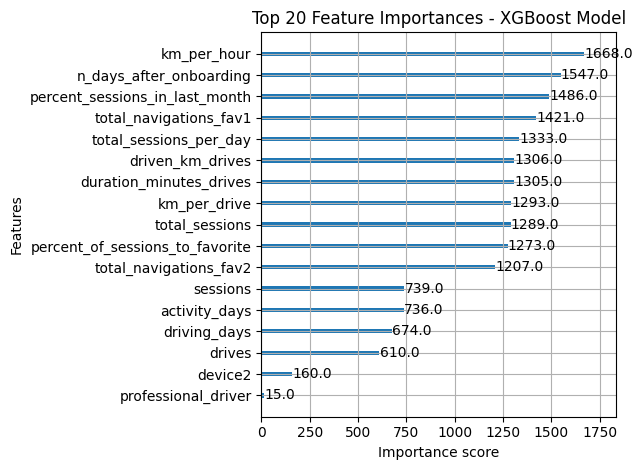

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot top 10 important features based on gain (i.e., contribution to performance)
plt.figure(figsize=(10, 6))
plot_importance(xgb_cv.best_estimator_, max_num_features=20, show_values=True)
plt.title("Top 20 Feature Importances - XGBoost Model")
plt.tight_layout()
plt.show()

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

Yes, I would recommend using the XGBoost model for churn prediction, with some caveats. While the model’s recall on the test data was solid and consistent with the validation set, the precision did drop, indicating it generates more false positives than ideal. However, for churn prevention, high recall is often more important—it’s better to identify more potential churners (even with some false alarms) than miss users who actually churn. The model demonstrates a meaningful ability to generalize to unseen data and can be used as a decision-support tool rather than a sole determinant of user retention strategy.

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

Splitting the data into three sets allows for model tuning without leaking information into the final test set. The validation set is used to fine-tune hyperparameters and compare models, while the test set is kept completely separate to provide an unbiased estimate of the model's real-world performance. The tradeoff is that you have less data to train the model, but the evaluation is more robust and reliable.

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

Logistic regression is:

Simple, interpretable, and fast

Useful when model transparency is critical

Easier to communicate to non-technical stakeholders

Often performs well when the relationship between features and the outcome is linear

It’s ideal when the goal is to understand the impact of individual variables rather than maximize predictive power.

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

Ensemble tree models:

Capture nonlinear relationships and feature interactions automatically

Handle missing data and outliers more robustly

Are often more accurate when complex patterns exist in the data

Provide feature importance, helping identify the most predictive factors

They're better suited for prediction-focused applications where interpretability can be balanced with performance.

5. What could you do to improve this model?

To improve the model, we could:

Tune hyperparameters more extensively using grid/random search with cross-validation

Balance the dataset (if imbalanced) using techniques like SMOTE or undersampling

Apply feature selection to reduce noise

Create interaction terms or higher-order features

Experiment with different algorithms, like LightGBM or CatBoost

6. What additional features would you like to have to help improve the model?

Additional features that could be useful:

User engagement over time (e.g., time series of daily/weekly activity)

In-app behavior patterns (e.g., feature usage, navigation types)

Support interactions (e.g., help center usage, complaint submissions)

Demographics or geolocation data (where ethically and legally permissible)

Referral source or acquisition channel

These would help capture deeper behavioral signals that correlate with churn.